<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>

# Visualización de la información: Tarea #2

<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Fernando Becerra </em><br>
    
**Nombre Estudiante**:  
- Cristhian Solís

### Objetivo:
Reproducir lo más fielmente dos (2) visualizaciones distintas provistas por el profesor, la idea aquí es crear una visualización lo más cercana a las dadas por el profesor en cuanto a anotaciones, colores, espacios, fuentes, textos, tipo de grafico, etcétera.

### Criterios de evaluación
- Título, subtitulo y notas adicionales de la visualización
- Ejes X e Y, labels, ticks, rangos, tipo de escala (lineal, logarítmica)+
- Grilla y leyenda
- Gráfico y/o representación de datos (si es gráfico de líneas, de barras, de calor, etcétera)
- Colores, mapa de colores y escalas de colores, donde además se incluyen el rango  y los labels de la escala
- Anotaciones más cualquiero elemento que resalte algún aspecto del gráfico (rectángulos, círculos, líneas)

### Desarrollo

En los siguientes bloques de codigos se implementan la replica  de visualizaciones entregadas

In [398]:
# Importación de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import Image
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
from flexitext import flexitext
from skimage import io

**Visualización N_1**

In [399]:
# Carga del dataframe N_1
try:
    df = pd.read_csv(r'.\data\01-behavioural-finance.csv', index_col=0)
except FileNotFoundError:
    print("El archivo no se encontró.")
except pd.errors.EmptyDataError:
    print("El archivo está vacío.")
except Exception as e:
    print(f"Ocurrió un error: {e}")


In [409]:
# Revisión inicial
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Aus to UK
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Aus     14 non-null     float64
 1   Bel     15 non-null     float64
 2   Den     15 non-null     float64
 3   Fin     14 non-null     float64
 4   Fra     15 non-null     float64
 5   Ger     15 non-null     float64
 6   Gre     15 non-null     float64
 7   Ire     15 non-null     float64
 8   Ita     15 non-null     float64
 9   NL      15 non-null     float64
 10  Nor     14 non-null     float64
 11  Por     15 non-null     float64
 12  Spa     15 non-null     float64
 13  Swe     14 non-null     float64
 14  UK      15 non-null     float64
dtypes: float64(15)
memory usage: 2.4+ KB


,Aus,Bel,Den,Fin,Fra,Ger,Gre,Ire,Ita,NL,Nor,Por,Spa,Swe,UK
Origin of trust,,,,,,,,,,,,,,,
Aus,0.38,-0.00,-0.06,-0.04,-0.05,0.10,-0.02,-0.06,-0.01,-0.04,-0.04,-0.03,-0.04,-0.01,-0.08
Bel,-0.03,0.12,-0.02,-0.04,0.02,-0.03,-0.00,-0.01,0.02,-0.03,-0.06,0.01,-0.01,-0.04,-0.04
Den,0.05,-0.04,0.31,0.04,-0.08,-0.03,-0.05,0.02,-0.04,0.10,0.22,-0.04,-0.06,0.15,0.05
Fin,0.05,-0.04,0.06,0.36,-0.08,-0.07,-0.10,-0.05,-0.12,-0.03,0.16,-0.12,-0.14,0.09,0.03
Fra,-0.07,0.04,-0.01,-0.03,0.25,0.06,0.01,0.01,0.05,-0.02,-0.03,0.04,0.04,-0.01,-0.05


In [401]:
# Manejo del dataframe
nuevo_orden = ['Fin', 'Nor', 'Swe', 'Den', 'UK', 'Ire', 'NL', 'Ger', 'Bel', 'Aus', 'Fra', 'Ita', 'Spa', 'Por', 'Gre']
nuevo_orden_inverso = nuevo_orden[::-1]
df_reordenado = df.reindex(nuevo_orden,columns=nuevo_orden_inverso + [columna for columna in df.columns if columna not in nuevo_orden])
df_reordenado = df_reordenado * 100
df_reordenado.head()

,Gre,Por,Spa,Ita,Fra,Aus,Bel,Ger,NL,Ire,UK,Den,Swe,Nor,Fin
Origin of trust,,,,,,,,,,,,,,,
Fin,-10.0,-12.0,-14.0,-12.0,-8.0,5.0,-4.0,-7.0,-3.0,-5.0,3.0,6.0,9.0,16.0,36.0
Nor,-8.0,-8.0,-10.0,-6.0,-5.0,NaN,1.0,-4.0,5.0,2.0,10.0,24.0,NaN,NaN,NaN
Swe,-8.0,-7.0,-12.0,-8.0,-11.0,8.0,-6.0,-8.0,-3.0,2.0,7.0,12.0,10.0,15.0,8.0
Den,-5.0,-4.0,-6.0,-4.0,-8.0,5.0,-4.0,-3.0,10.0,2.0,5.0,31.0,15.0,22.0,4.0
UK,-1.0,1.0,-1.0,3.0,-8.0,-5.0,-2.0,-11.0,4.0,3.0,28.0,2.0,-3.0,-1.0,-3.0


In [534]:
# Definición de paleta de colores
mask = df_reordenado.isna()
my_gradient=LinearSegmentedColormap.from_list('my_gradient', (
    (0.000, (0.922, 0.455, 0.349)),
    (0.105, (0.969, 0.553, 0.443)),
    (0.225, (0.937, 0.796, 0.769)),
    (0.295, (1.000, 1.000, 1.000)),
    (0.305, (1.000, 1.000, 1.000)),
    (0.566, (0.141, 0.875, 0.945)),
    #(0.719, (0.290, 0.565, 0.757)),
    (0.950, (0.290, 0.416, 0.757)),
    (1.000, (0.188, 0.255, 0.435))))
my_gradient.set_bad(color=(0.675, 0.690, 0.733))

my_gradient = LinearSegmentedColormap.from_list('my_gradient', ( 
    (0.000, (0.922, 0.455, 0.349)),
    (0.105, (0.969, 0.553, 0.443)),
    (0.225, (0.937, 0.796, 0.769)),
    (0.295, (1.000, 1.000, 1.000)),
    (0.305, (1.000, 1.000, 1.000)),
    (0.566, (0.141, 0.875, 0.945)),
    (0.719, (0.220, 0.796, 0.965)),
    (0.794, (0.071, 0.663, 0.890)),
    (0.899, (0.204, 0.671, 0.969)),
    (1.000, (0.259, 0.675, 1.000))))}


    LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#40.7:4A90C1-64.1:4A6AC1-100:30416F
    (0.000, (0.290, 0.565, 0.757)),
    (0.407, (0.290, 0.565, 0.757)),
    (0.641, (0.290, 0.416, 0.757)),
    (1.000, (0.188, 0.255, 0.435))))

    LinearSegmentedColormap.from_list('my_gradient', (
GRIS
    (0.000, (0.675, 0.690, 0.733)),
    (1.000, (0.675, 0.690, 0.733))))

    LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#445D9F
    (0.000, (0.267, 0.365, 0.624)),
    (1.000, (0.267, 0.365, 0.624))))

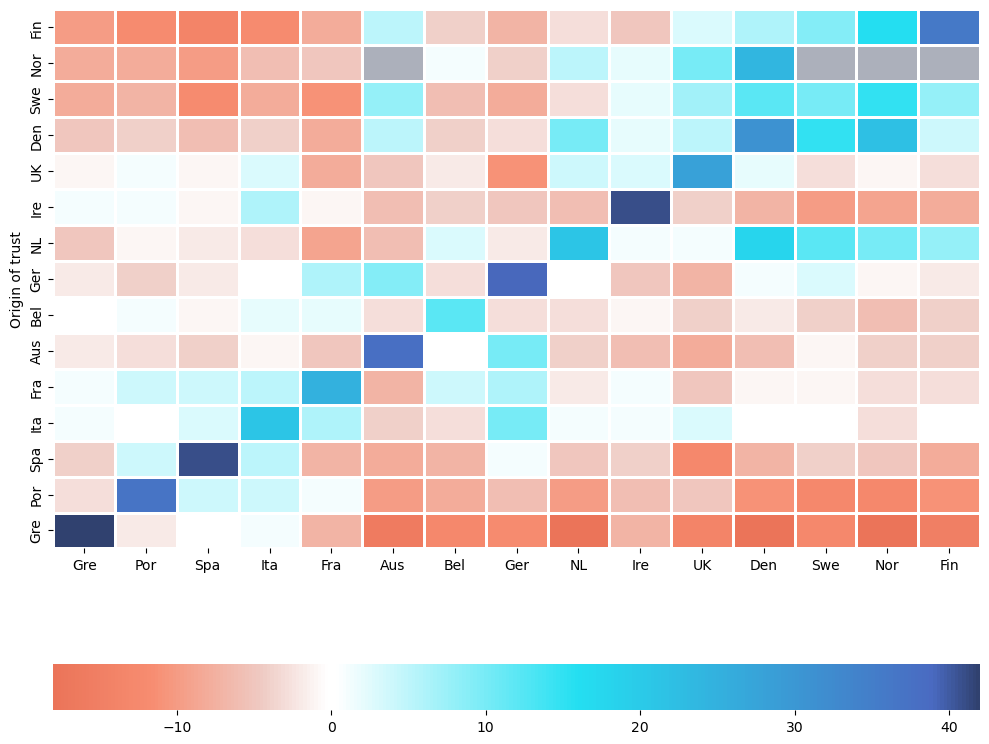

In [535]:
# Creación de figura y axis
fig, ax = plt.subplots(figsize=(10, 8))

# Definición de tipo de gráfico
heatmap = sns.heatmap(df_reordenado,
                      annot=False,
                      cmap=my_gradient,
                      mask=mask,
                      linecolor='white',
                      linewidths=1, 
                      cbar_kws={'orientation': 'horizontal'})


# Mostrar el gráfico
fig.tight_layout()
plt.show()

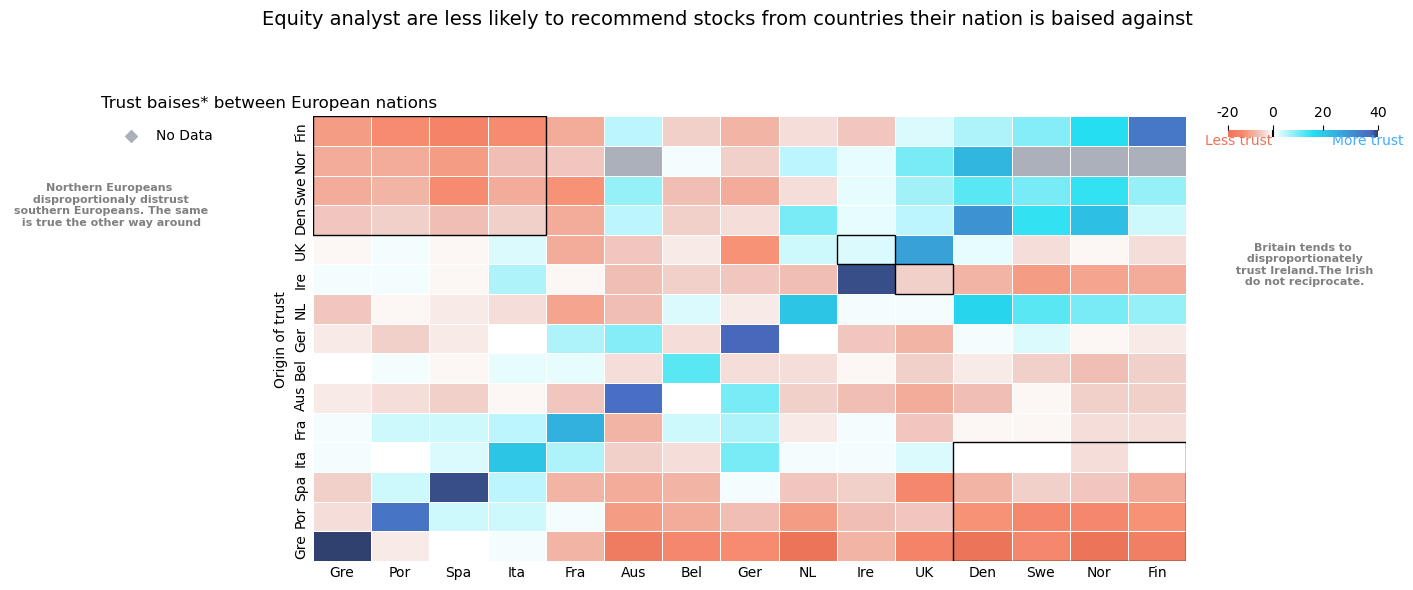

In [651]:
# Creación de figura y axis
fig, ax = plt.subplots(figsize=(10, 8))

# Definición de tipo de gráfico
heatmap = sns.heatmap(df_reordenado,
                      annot=False,
                      cmap=my_gradient,
                      mask=mask,
                      linecolor='white',
                      linewidths=0.5, 
                      cbar_kws={'orientation': 'horizontal'})

# Titulo y subtitulo
fig.suptitle("Equity analyst are less likely to recommend stocks from countries their nation is baised against", color='black', fontsize=14)
ax.set_title("Trust baises* between European nations", fontsize=12)
ax.title.set_position([-0.05, 1])

# Figura
fig.tight_layout(pad=3.0)

# Leyenda
plt.scatter([], [], color=(0.675, 0.690, 0.733), label='No Data', marker='D')
plt.legend(bbox_to_anchor=(-0.1,1), frameon=False)

# Barra de color
cbar = heatmap.collections[0].colorbar
cbar.ax.set_position([1, 0.80, 0.15, 0.03])  # [left, bottom, width, height]
cbar.set_ticks([cbar.vmin, 0, 20, cbar.vmax])
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')
cbar.set_ticklabels(['-20','0','20', '40']) 
cbar.ax.axvline(0.05, color='black', linestyle='-')
cbar.ax.text(0.07, -0.5, 'Less trust', ha='center', va='center', transform=cbar.ax.transAxes, color=(0.922, 0.455, 0.349))
cbar.ax.text(0.93, -0.5, 'More trust', ha='center', va='center', transform=cbar.ax.transAxes, color=(0.259, 0.675, 1.000))

# Ticks
ax.tick_params(axis='x', which='major', length=0)
ax.tick_params(axis='y', which='major', length=0)

# elementos distintivos
rect = plt.Rectangle((0, 0), 4, 4, linewidth=1, edgecolor='black', facecolor='none')
rect_2 = plt.Rectangle((11, 11), 4, 4, linewidth=1, edgecolor='black', facecolor='none')
rect_3 = plt.Rectangle((9, 4), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
rect_4 = plt.Rectangle((10, 5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
plt.gca().add_patch(rect)
plt.gca().add_patch(rect_2)
plt.gca().add_patch(rect_3)
plt.gca().add_patch(rect_4)
plt.text(17, 5, 'Britain tends to\n disproportionately\n trust Ireland.The Irish\n do not reciprocate.', 
         horizontalalignment='center', verticalalignment='center', fontsize=8, color='grey', weight='bold')
plt.plot([0, 5], [-0.5, -0.5], color='black', linewidth=1, linestyle='-')

plt.text(-3.5, 3, 'Northern Europeans\n disproportionaly distrust\n southern Europeans. The same\n is true the other way around', 
         horizontalalignment='center', verticalalignment='center', fontsize=8, color='grey', weight='bold')

# Mostrar el gráfico
#fig.tight_layout()
plt.show()

In [525]:
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df.shape[0],0, df.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

**Visualización N_2**

In [407]:
# Carga del dataframe
try:
    df_happiness = pd.read_csv(r'.\data\02-happiness-economics.csv')
except FileNotFoundError:
    print("El archivo no se encontró.")
except pd.errors.EmptyDataError:
    print("El archivo está vacío.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

In [408]:
# Encabezados
df_happiness.head()

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
0,1,Afghanistan,AF,3.723590,1298.143187,1.324255e+07,1,2008,rise-fall,True,<25m,1
1,2,Albania,AL,4.634252,8754.565278,2.269081e+06,1,2008,rise-rise,False,<25m,1
2,3,Argentina,AR,6.115706,17643.280656,2.932879e+07,3,2008,rise-fall,True,25m-100m,2
3,4,Armenia,AM,4.607600,6893.071401,2.384185e+06,3,2008,rise-rise,False,<25m,1
4,5,Australia,AU,7.293279,40313.264414,1.670645e+07,3,2008,rise-fall,True,<25m,1


In [347]:
# Encabezados
df_happiness.describe()

,Unnamed: 0,happy,gdp.pc,pop,obs,year,pop.levels
count,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.00000,250.000000
mean,125.500000,5.452395,17979.488308,3.881314e+07,3.108000,2013.00000,1.332000
std,72.312977,1.125600,17590.526322,1.293912e+08,0.957079,5.01003,0.656888
min,1.000000,3.005142,652.056768,2.511490e+05,1.000000,2008.00000,1.000000
25%,63.250000,4.663815,3729.216182,3.883648e+06,3.000000,2008.00000,1.000000
50%,125.500000,5.311014,12239.157128,8.017570e+06,3.000000,2013.00000,1.000000
75%,187.750000,6.213347,27652.936668,2.346547e+07,4.000000,2018.00000,1.000000
max,250.000000,7.941353,96244.356304,1.140639e+09,4.000000,2018.00000,4.000000


In [335]:
# Aplicar una escala logarítmica a la columna 'gdp.pc'
df_happiness['gdp.pc'] = np.log(df_happiness['gdp.pc'])


In [337]:
# Encabezados
df_happiness.head()

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
0,1,Afghanistan,AF,3.723590,7.168690,1.324255e+07,1,2008,rise-fall,True,<25m,1
1,2,Albania,AL,4.634252,9.077331,2.269081e+06,1,2008,rise-rise,False,<25m,1
2,3,Argentina,AR,6.115706,9.778110,2.932879e+07,3,2008,rise-fall,True,25m-100m,2
3,4,Armenia,AM,4.607600,8.838272,2.384185e+06,3,2008,rise-rise,False,<25m,1
4,5,Australia,AU,7.293279,10.604436,1.670645e+07,3,2008,rise-fall,True,<25m,1


In [341]:
# Encabezados
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  250 non-null    int64  
 1   name        250 non-null    object 
 2   iso2c       248 non-null    object 
 3   happy       250 non-null    float64
 4   gdp.pc      250 non-null    float64
 5   pop         250 non-null    float64
 6   obs         250 non-null    int64  
 7   year        250 non-null    int64  
 8   quadrant    250 non-null    object 
 9   paradox     250 non-null    bool   
 10  pop.break   250 non-null    object 
 11  pop.levels  250 non-null    int64  
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 21.9+ KB


In [342]:
# Encabezados
df_happiness.describe()

,Unnamed: 0,happy,gdp.pc,pop,obs,year,pop.levels
count,250.000000,250.000000,250.000000,2.500000e+02,250.000000,250.00000,250.000000
mean,125.500000,5.452395,9.206243,3.881314e+07,3.108000,2013.00000,1.332000
std,72.312977,1.125600,1.224188,1.293912e+08,0.957079,5.01003,0.656888
min,1.000000,3.005142,6.480132,2.511490e+05,1.000000,2008.00000,1.000000
25%,63.250000,4.663815,8.223862,3.883648e+06,3.000000,2008.00000,1.000000
50%,125.500000,5.311014,9.412394,8.017570e+06,3.000000,2013.00000,1.000000
75%,187.750000,6.213347,10.227462,2.346547e+07,4.000000,2018.00000,1.000000
max,250.000000,7.941353,11.474646,1.140639e+09,4.000000,2018.00000,4.000000


In [348]:
# Aplicar una escala logarítmica a la columna 'gdp.pc'
df_happiness['gdp.pc'] = np.log(df_happiness['gdp.pc'])

# Filtrar el DataFrame para mostrar los países con una población de más de 5 millones de personas en el año 2018
countries_with_pop_over_5m_2018 = df_happiness[(df_happiness['pop'] > 5000000) & (df_happiness['year'] == 2018)]['name'].unique()

# Filtrar los datos previos y del 2018 de estos países
filtered_df = df_happiness[df_happiness['name'].isin(countries_with_pop_over_5m_2018)]

In [349]:
# Encabezados
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  170 non-null    int64  
 1   name        170 non-null    object 
 2   iso2c       170 non-null    object 
 3   happy       170 non-null    float64
 4   gdp.pc      170 non-null    float64
 5   pop         170 non-null    float64
 6   obs         170 non-null    int64  
 7   year        170 non-null    int64  
 8   quadrant    170 non-null    object 
 9   paradox     170 non-null    bool   
 10  pop.break   170 non-null    object 
 11  pop.levels  170 non-null    int64  
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 16.1+ KB


In [350]:
# Filtrar datos para los años 2008 y 2018
df_2008 = filtered_df[filtered_df['year'] == 2008]
df_2018 = filtered_df[filtered_df['year'] == 2018]


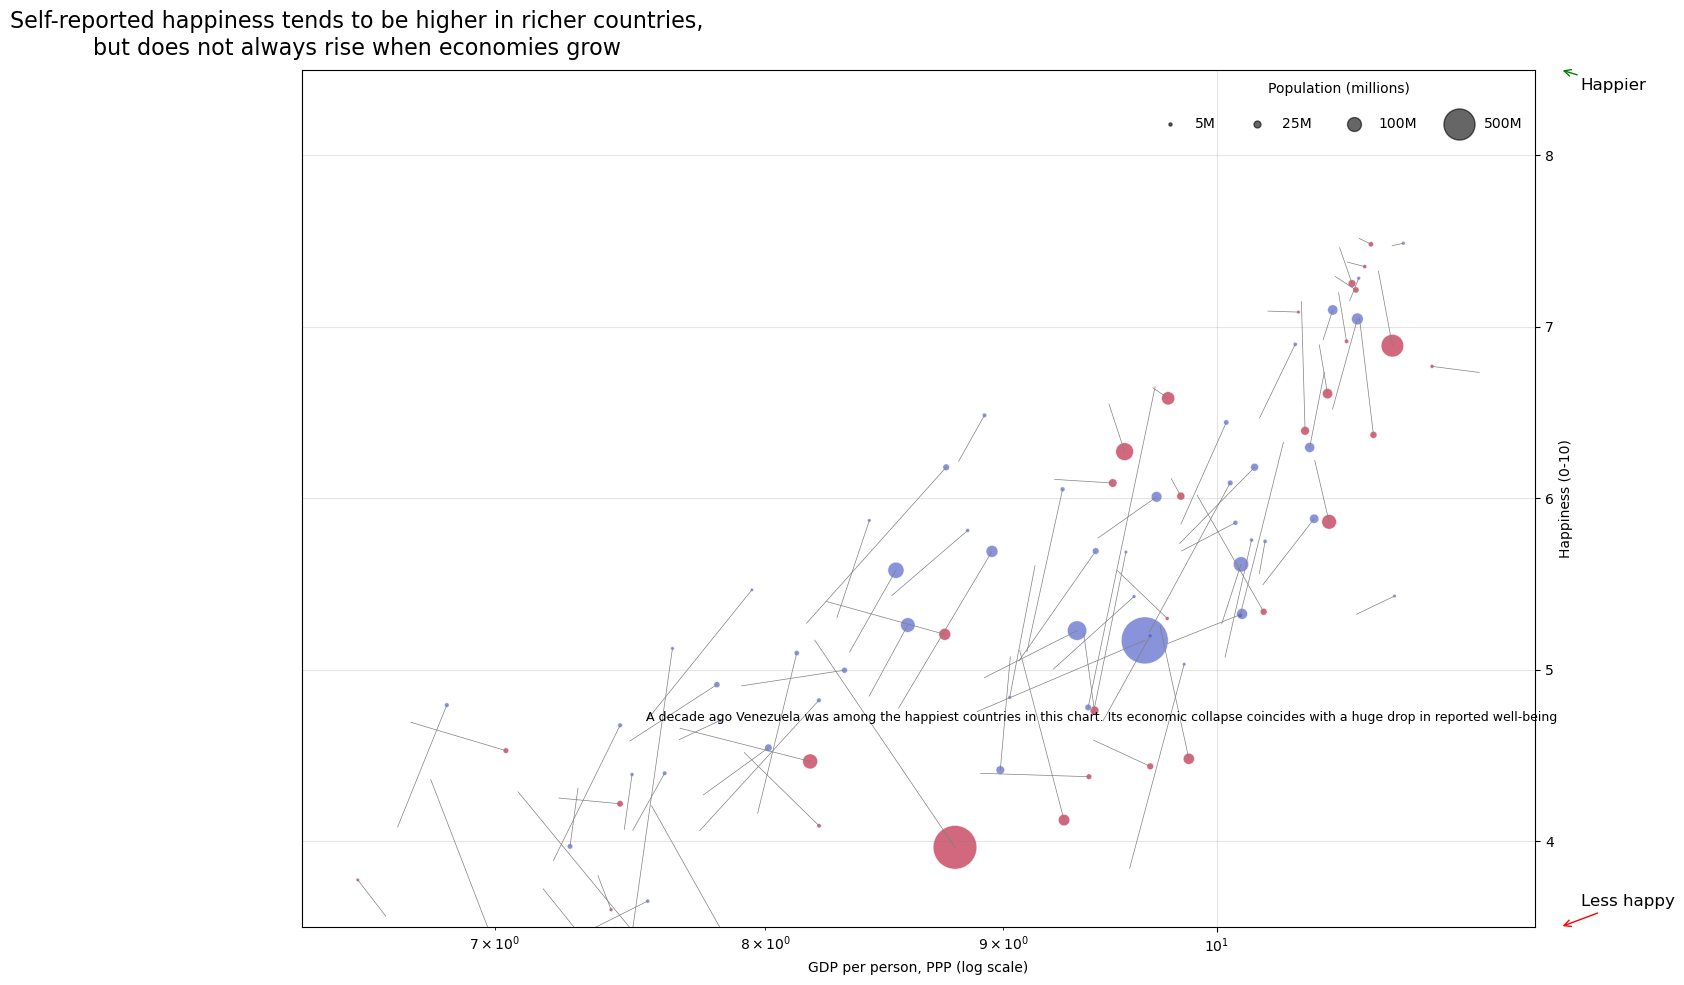

In [377]:
# Crear figura y eje
fig, ax = plt.subplots(figsize=(14, 10))

# Gráfico de dispersión para los datos de 2018
scatter = ax.scatter(
    df_2018['gdp.pc'], 
    df_2018['happy'], 
    s=df_2018['pop'] / 1e6,  # Escalar población para el tamaño de las burbujas
    c=df_2018['paradox'], 
    cmap='coolwarm', 
    alpha=0.6, 
    edgecolors="w", 
    linewidth=0.5
)
fig.suptitle("Self-reported happiness tends to be higher in richer countries,\nbut does not always rise when economies grow", color='black', fontsize=16, x=0.05)
# Añadir líneas que conectan los datos de 2008 y 2018 para cada país
for country in df_2018['name'].unique():
    if country in df_2008['name'].values:
        gdp_2008 = df_2008[df_2008['name'] == country]['gdp.pc'].values[0]
        happy_2008 = df_2008[df_2008['name'] == country]['happy'].values[0]
        gdp_2018 = df_2018[df_2018['name'] == country]['gdp.pc'].values[0]
        happy_2018 = df_2018[df_2018['name'] == country]['happy'].values[0]
        
        ax.plot(
            [gdp_2008, gdp_2018], 
            [happy_2008, happy_2018], 
            color='gray', 
            linestyle='-', 
            linewidth=0.5
        )

# Ajustes eje Y
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_ylim(3.5, 8.5)
ax.set_yticks([4, 5, 6, 7, 8])
# Agregar anotaciones "Happier" y "Less happy" con flechas
ax.annotate('Happier', xy=(1.02, 1), xycoords='axes fraction', fontsize=12,
            xytext=(15, -15), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='green'))
ax.annotate('Less happy', xy=(1.02, 0), xycoords='axes fraction', fontsize=12,
            xytext=(15, 15), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='red'))

# Ajustes eje X
ax.set_xscale('log')
ax.set_xticks([1, 5, 10, 50, 100])

# Grilla
ax.grid(alpha= 0.2, color='grey')
# Establecer etiquetas y título
ax.set_xlabel('GDP per person, PPP (log scale)')
ax.set_ylabel('Happiness (0-10)')
ax.set_title("")

# Anotar países específicos (ejemplo de anotaciones)
annotations = {
    'Venezuela': "A decade ago Venezuela was among the happiest countries in this chart. Its economic collapse coincides with a huge drop in reported well-being",
    'Norway': "Life satisfaction is high but decreasing slightly in Norway"
}

for country, annotation in annotations.items():
    if country in df_2018['name'].values:
        x = df_2018[df_2018['name'] == country]['gdp.pc'].values[0]
        y = df_2018[df_2018['name'] == country]['happy'].values[0]
        ax.annotate(annotation, (x, y), textcoords="offset points", xytext=(10,-10), ha='center', fontsize=9)

# Añadir leyenda personalizada horizontal
legend_labels = [5, 25, 100, 500]
legend_sizes = [5e6, 25e6, 100e6, 500e6]

for size in legend_sizes:
    plt.scatter([], [], c='k', alpha=0.6, s=size / 1e6, label=f'{int(size/1e6)}M')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1.5, title='Population (millions)', ncol=4)

fig.tight_layout()
plt.show()